<IPython.core.display.Javascript object>


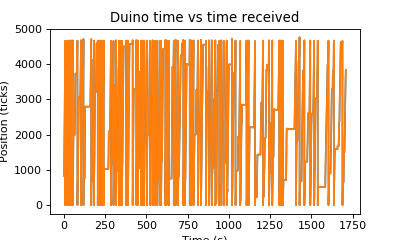

In [5]:
%matplotlib notebook

from pyvstim import parseVStimLog

log = 'P://presentation/190628_JC092_1P_JC/run04_retino_bandpass_bars_sf008_tf2.log'
log, com = parseVStimLog(log)
import pylab as plt
import numpy as np
plt.figure(figsize=[5,3])
plt.plot(log['position']['duinotime']/1000.,log['position']['value'])
plt.plot(log['position']['timereceived']/1000.,log['position']['value'])
plt.xlabel('Time (s)')
plt.ylabel('Position (ticks)')
plt.xlim()
plt.title('Duino time vs time received')
plt.show()

<IPython.core.display.Javascript object>


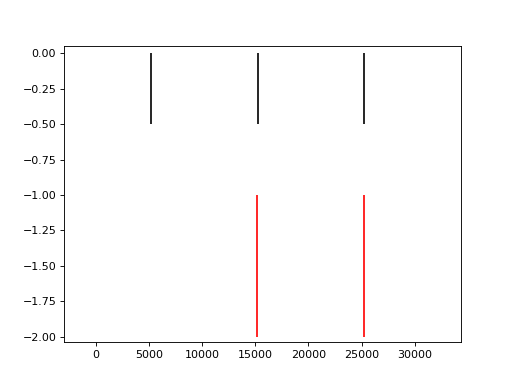

In [40]:
plt.figure()
import pandas as pd

ustims = np.array(log['vstim'].iStim*(1.-log['vstim'].blank))
utrials = np.array(log['vstim'].iTrial*(1.-log['vstim'].blank))
unique_reps = log['vstim'][['iStim','iTrial']].drop_duplicates()
unique_reps = unique_reps.iloc[np.array(unique_reps.iStim)>0]
stimtimes = np.zeros([len(unique_reps),2])
for i in range(len(unique_reps)):
    iStim,iTrial = unique_reps[['iStim','iTrial']].iloc[i]
    idx = np.where((ustims == iStim) & (utrials == iTrial))[0]
    stimtimes[i,:] = log['vstim'].duinotime.iloc[[idx[0],idx[-1]]]



# print(idxoffsets)
# print(log['vstim'].shape)
# timekey = 'presenttime'
# if 'duinotime' in log['vstim'].keys():
#     timekey = 'duinotime'
# else:
#     print('Using vstim times (no duino).')

# stimtimes = np.vstack([log['vstim'][timekey].iloc[idxonsets],
#                        log['vstim'][timekey].iloc[idxoffsets-1]])


plt.vlines(stimtimes[:,0],-0.5,0)
plt.vlines(stimtimes[:,1],-2,-1,color='r')


# stimtimes.shape


In [1]:
from pyvstim import getStimuliTimesFromLog
log = 'P://presentation/190527_JC096_1P_JC/run00_retino_circling_noise_circle_whiskers.log'

stimtimes,stimpars,stimopts = getStimuliTimesFromLog(log)

In [4]:
stimtimes.shape

(200L, 4L)